It is necessary with the marketing department to prepare a list of hypotheses for increasing revenue.
Prioritize hypotheses, run an A / B test, and analyze the results.

# Part 1. Prioritization of hypotheses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hypothesis.csv')

In [3]:
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Data Description

- Hypothesis - a short description of the hypothesis;
- Reach - user reach on a 10-point scale;
- Impact - impact on users on a 10-point scale;
- Confidence - сonfidence in the hypothesis on a 10-point scale;
- Efforts - resource costs for hypothesis testing on a 10-point scale. 

The higher the Efforts value, the more expensive it is to test the hypothesis.

In [4]:
#RICE
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts']

In [5]:
df.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,3.0


In [6]:
#ICE
df['ICE']  = df['Impact'] * df['Confidence'] / df['Efforts']

In [7]:
df.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,40.0,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,112.0,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,40.0,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,56.0,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,4.0,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,9.0,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,3.0,1.000000


### Conclusion

When prioritizing the RICE hypothesis, the leading positions were taken by hypotheses: 7, 2, 0, and 6. After using the ICE framework, the situation changed somewhat, now the hypotheses became leaders: 8, 0, 7, 6.

Hypothesis No. 6 retained its position in other cases.
The Reach parameter used in the RICE method has changed all the precedence obtained by the ICE method:
- without taking into account the coverage, the first place goes to the promotion with a discount for the birthday person, but the Reach parameter lowered the priority of this promotion;
- the same situation with the hypothesis of adding two traffic channels, with the organization of its own delivery service and with the idea of ​​adding a reviews page;
- the rating position of the hypotheses about adding banners with relevant promotions to the main page and the idea of ​​changing the background color of the main page remained unchanged;
- the RICE rating (compared to ICE) has grown in the rating (became more priority) (compared to ICE) the hypothesis of adding a subscription form to all the main pages of the resource, adding product recommendation blocks, and a proposal to add new traffic channels.

# Part 2. Analysis of the A / B test

In [8]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [9]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
visitors.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

#### 1. Plot the cumulative revenue by the group. Draw conclusions and assumptions

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeData 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


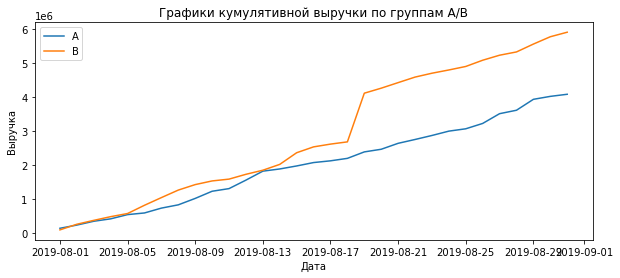

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

#### 2. Plot the cumulative average bill by the group. Draw conclusions and assumptions.

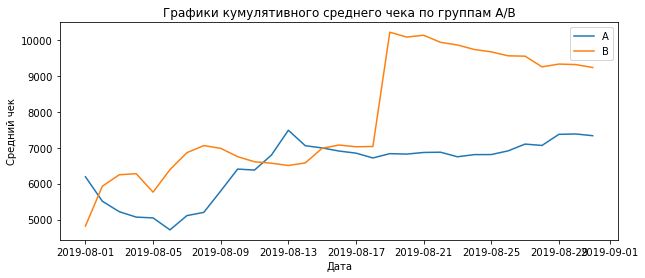

In [19]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.legend()
plt.show()

#### Plot the relative change in the cumulative average check of group B to group A. Draw conclusions and assumptions.

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

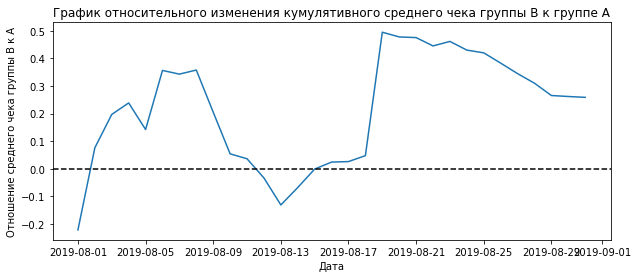

In [21]:
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

#### 4. Plot the cumulative conversion rate by the group. Draw conclusions and assumptions.

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

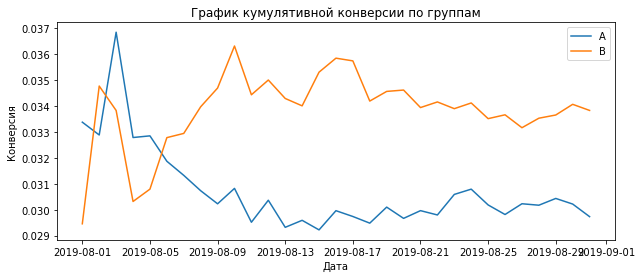

In [23]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.title('График кумулятивной конверсии по группам')
plt.legend()
plt.show()

The graph shows that at the beginning the conversion of group B is lower than A, but soon B overtakes A, and the graphs stabilize near their final values. In the first week, group members can draw different conclusions.

#### 5. Plot the relative change in the cumulative conversion of group B to group A. Draw conclusions and assumptions.

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])  

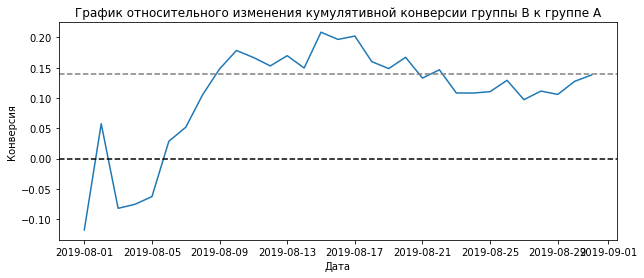

In [25]:
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

#### 6. Build a scatter plot of the number of orders by a user. Draw conclusions and assumptions.

In [26]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

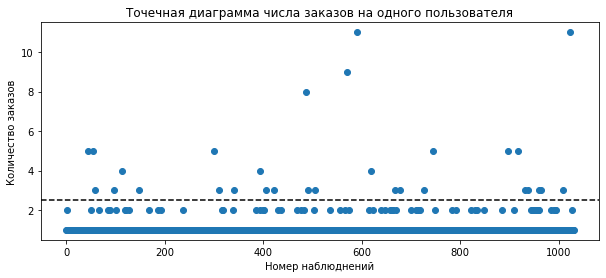

In [27]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.axhline(y=2.5 , color='black', linestyle='--') 
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Номер наблюднений')
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

#### 7. Calculate the 95th and 99th percentiles of the number of orders per user. Select a border to identify abnormal user

In [28]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])

In [29]:
print('the 95 percentile of orders for 1 user is : {}'.format(percentiles[0]))
 
print('the 99 percentile of orders for 1 user is: {}'.format(percentiles[1]))

the 95 percentile of orders for 1 user is : 2.0
the 99 percentile of orders for 1 user is: 4.0


#### 8. Build a scatter plot of order values. Draw conclusions and assumptions

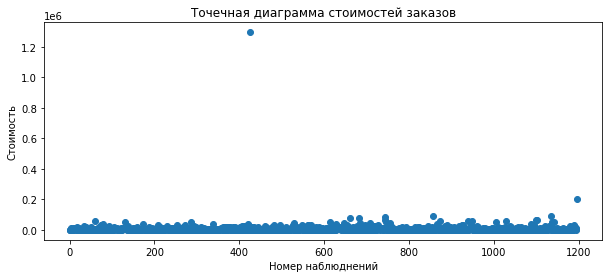

In [30]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Номер наблюднений')
plt.ylabel('Стоимость')
plt.title('Точечная диаграмма стоимостей заказов')
plt.show()

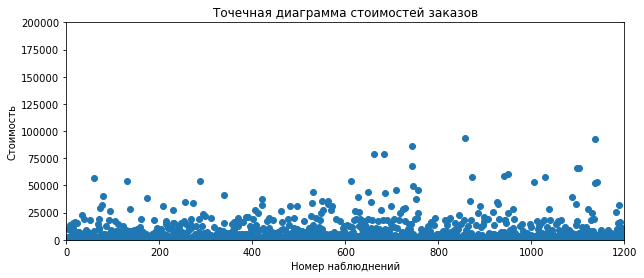

In [31]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 200000])
plt.xlabel('Номер наблюднений')
plt.ylabel('Стоимость')
plt.title('Точечная диаграмма стоимостей заказов')
plt.show()

#### 9. Calculate the 95th and 99th percentiles of the order value. Select the border for abnormal orders.

In [32]:
percentiles_orders = np.percentile(orders['revenue'], [95, 99])

In [33]:
print('the 95 percentile of orders for 1 user is : {:.2f}'.format(percentiles_orders[0]))
 
print('the 99 percentile of orders for 1 user is: {:.2f}'.format(percentiles_orders[1]))

the 95 percentile of orders for 1 user is : 28000.00
the 99 percentile of orders for 1 user is: 58233.20


#### 10. Calculate the statistical significance of the differences in conversion between groups based on raw data. Draw conclusions and assumptions.

In [34]:
#the number of visitors per day for group A
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#aggregated data by day of visits by group A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#he number of visitors per day for group B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#ggregated data by day of visits by group B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#cumulative data for group A
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#cumulative data for group B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#create one datafarame
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')


In [35]:
#the number of completed orders by users by groups
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#number of orders per users for group A, including zero orders
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

#number of orders per users for group B, including zero orders
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#hypothesis testing and calculation of the relative increase in conversion of group B
results = stats.mannwhitneyu(sampleA, sampleB)
print("P-value is {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("The relative increase in conversion of group B in relation to group A is {:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 
alpha = 0.05
if results.pvalue < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Falling the Null Hypothesis')

P-value is 0.008
The relative increase in conversion of group B in relation to group A is 0.138
Reject the Null Hypothesis


p-value = 0.008 which is less than 0.05. This means that we reject the null hypothesis that there are no statistically significant differences in conversion between groups. Group B's relative gain is 13.8%.
According to the raw data, the difference in the conversion of groups A and B is statistically significant.

#### 11. Calculate the statistical significance of the differences in the average check for the group for the "raw" data. Draw conclusions and assumptions.

In [36]:
alpha = 0.05
print('The relative change in the average check in group B in relation to group A is {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value is {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Falling the Null Hypothesis')

The relative change in the average check in group B in relation to group A is 0.259
P-value is 0.365
Falling the Null Hypothesis


We accept the null hypothesis: there are no statistically significant differences in the average order receipt between the groups. P-value = 0.365. This tells us that there are no statistically significant differences in the mean check between groups. The relative change in the average check in group B in relation to group A is 0.259

#### 12. Calculate the statistical significance of the differences in conversion between groups based on the "cleaned" data. Draw conclusions and assumptions.

The following user data was taken as anomalies:
- made more than 2 orders;
- have at least 1 purchase worth more than RUB 30,000

In [37]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [38]:
abnormalUsers.shape

(68,)

In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print("P-value is {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("The relative increase in conversion of group B in relation to group A is {:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
alpha = 0.05
if results.pvalue < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Falling the Null Hypothesis')

P-value is 0.007
The relative increase in conversion of group B in relation to group A is 0.172
Reject the Null Hypothesis


We reject the null hypothesis, the conversion of group B differs in conversion from group A even in the cleaned data P-value is 0.007. The relative increase in conversion of group B in relation to group A is 0.172

#### 13. Calculate the statistical significance of the differences in the average check for the group for the "cleaned" data. Draw conclusions and assumptions.

In [40]:
print('The relative change in the average check in group B relative to group A after clearing the data is {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value is {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Falling the Null Hypothesis')

The relative change in the average check in group B relative to group A after clearing the data is -0.023
P-value is 0.360
Falling the Null Hypothesis


We accept the null hypothesis: there are no statistically significant differences in the average order receipt between groups, even in the cleaned data. P-value = 0.360, greater than 0.05. This tells us that there are no statistically significant differences in the mean check between groups. The relative change in the average check-in group B relative to group A after clearing the data is -0.023

#### 14. Make a decision based on the test results and explain it. Solutions: 1. Stop the test, fix the victory of one of the groups. 2. Stop the test, record the absence of differences between the groups. 3. Continue the test.

We found no difference between the average check for groups A and B, both when working with raw data and after clearing anomalies.
The difference in conversion was revealed even during the initial analysis: we found that the difference was statistically significant with a relative increase in conversion of 14%, and after clearing the data from the anomaly, the indicator increased to 17%.
    Based on this, we can say that the difference in conversion rates between groups before and after data cleansing is statistically significant. We can end the test, declaring it successful, and fix the victory of group B.